In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
df = pd.read_excel('ref.xlsx')
print(df.head())

   序号  孕妇代码  年龄     身高    体重                 末次月经 IVF妊娠      检测日期  检测抽血次数  \
0   1  A001  31  160.0  72.0  2023-02-01 00:00:00  自然受孕  20230429       1   
1   2  A001  31  160.0  73.0  2023-02-01 00:00:00  自然受孕  20230531       2   
2   3  A001  31  160.0  73.0  2023-02-01 00:00:00  自然受孕  20230625       3   
3   4  A001  31  160.0  74.0  2023-02-01 00:00:00  自然受孕  20230716       4   
4   5  A002  32  149.0  74.0  2023-11-09 00:00:00  自然受孕  20240219       1   

    检测孕周  ...    Y染色体浓度    X染色体浓度  13号染色体的GC含量  18号染色体的GC含量  21号染色体的GC含量  \
0  11w+6  ...  0.025936  0.038061     0.377069     0.389803     0.399399   
1  15w+6  ...  0.034887  0.059572     0.371542     0.384771     0.391706   
2  20w+1  ...  0.066171  0.075995     0.377449     0.390582     0.399480   
3  22w+6  ...  0.061192  0.052305     0.375613     0.389251     0.397212   
4  13w+6  ...  0.059230  0.059708     0.380260     0.393618     0.404868   

   被过滤掉读段数的比例  染色体的非整倍体  怀孕次数  生产次数  胎儿是否健康  
0    0.027484       NaN     1     

In [3]:
age = df['年龄']
print (len(df))

1082


In [4]:
df = df[df['原始读段数'] >= 3000000]
df = df[df['在参考基因组上比对的比例'] <= 0.9]
df = df[df['在参考基因组上比对的比例'] >= 0.7]
df = df[df['重复读段的比例'] <=0.2]
df = df[df['唯一比对的读段数  '] >=2800000]
df = df[df['GC含量'] >=0.38]
df = df[df['GC含量'] <=0.46]
df = df[df['被过滤掉读段数的比例'] <=0.25]
print (len(df))


928


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 假设您的数据已经经过上述条件筛选，存储在 df_clean 中

# 设置中文字体（如果标签需要中文）
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 定义要绘制的质控指标及其对应的阈值
qc_metrics = {
    '原始读段数': {'lower': 3000000, 'upper': None, 'log_scale': True},
    '在参考基因组上比对的比例': {'lower': 0.7, 'upper': 0.9, 'log_scale': False},
    '重复读段的比例': {'lower': 0, 'upper': 0.2, 'log_scale': False},
    '唯一比对的读段数  ': {'lower': 2900000, 'upper': None, 'log_scale': True},
    'GC含量': {'lower': 0.38, 'upper': 0.46, 'log_scale': False},
    '被过滤掉读段数的比例': {'lower': 0, 'upper': 0.25, 'log_scale': False}
}

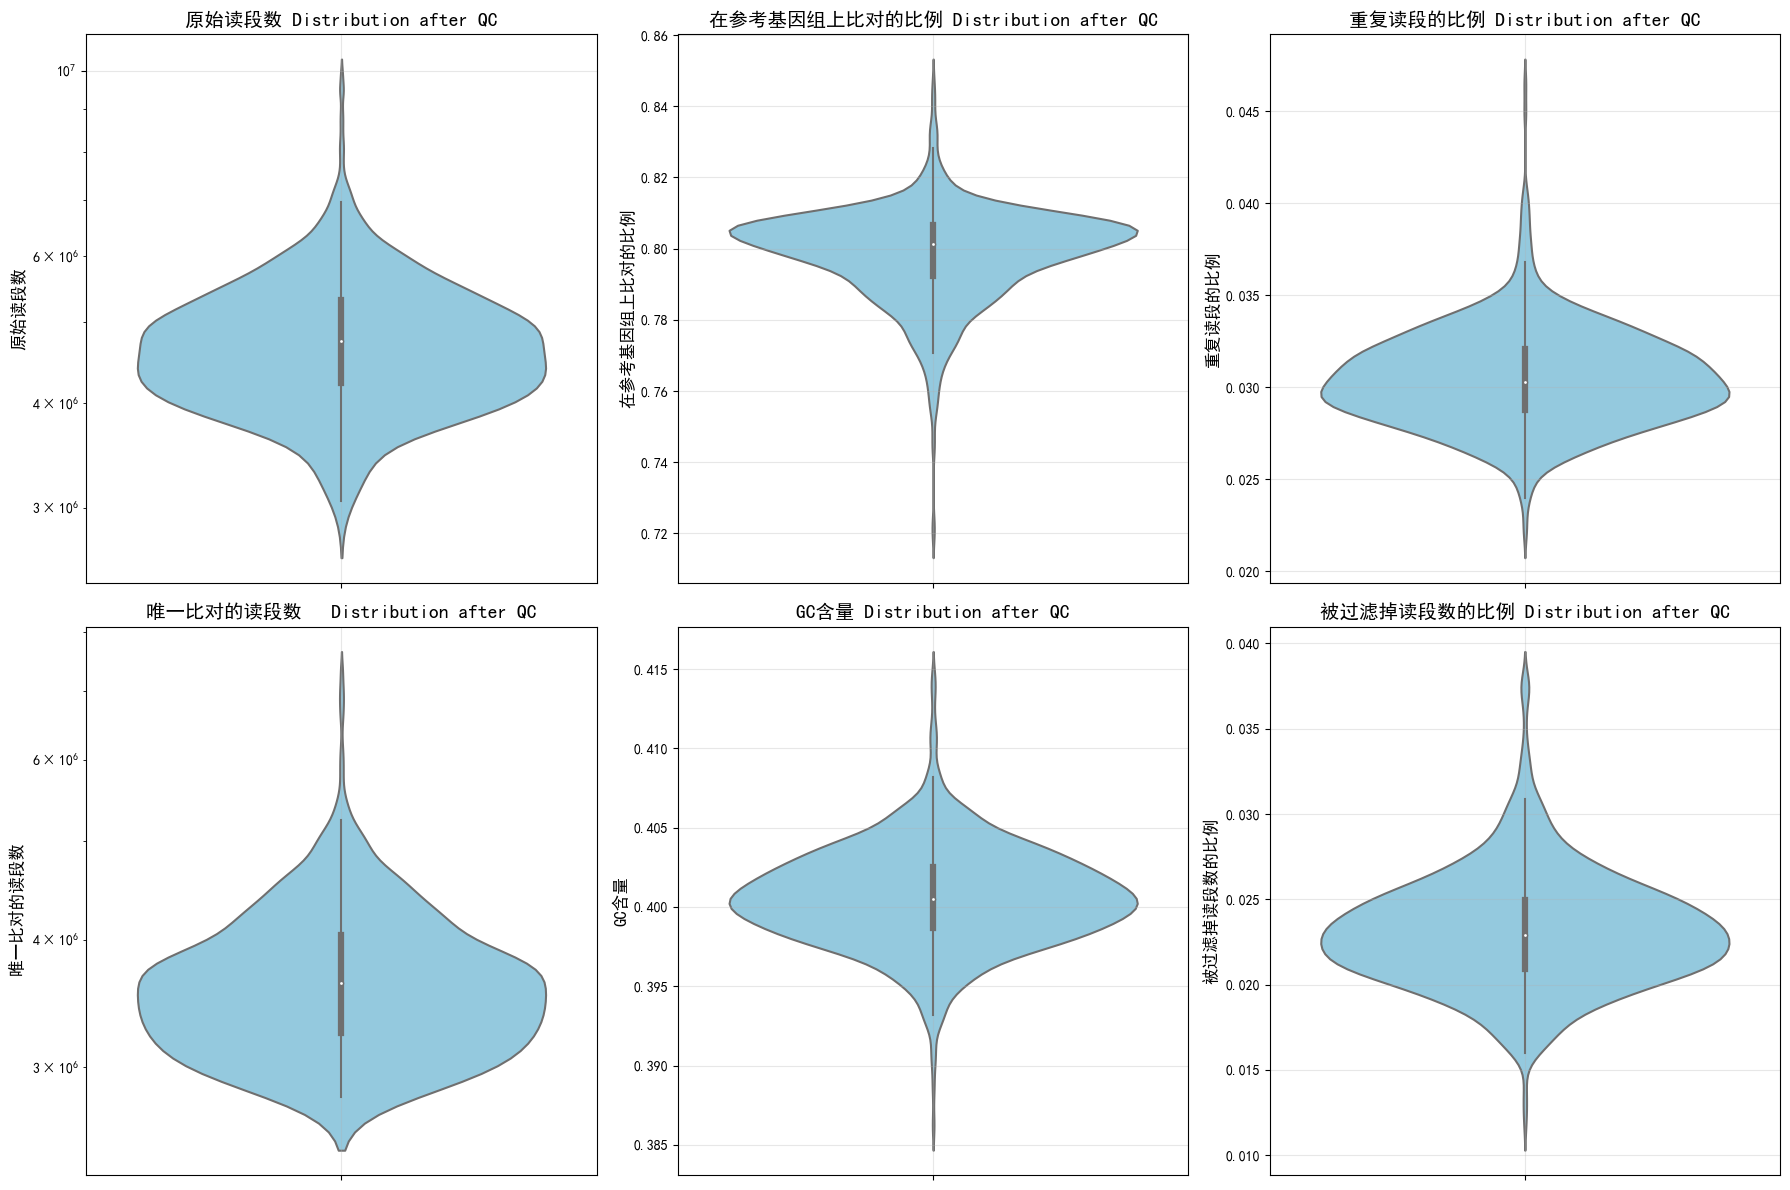

In [6]:
# 创建图形
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# 为每个指标绘制小提琴图
for i, (metric, params) in enumerate(qc_metrics.items()):
    ax = axes[i]
    
    # 绘制小提琴图
    sns.violinplot(y=df[metric], ax=ax, color='skyblue', inner='box')
    
    # 添加swarmplot显示个体数据点（对于大数据集可以注释掉以免过于密集）
    #sns.swarmplot(y=df[metric], ax=ax, color='black', size=2, alpha=0.6)
    
    # 添加阈值线
    #if params['lower'] is not None:
    #    ax.axhline(y=params['lower'], color='red', linestyle='--', alpha=0.7, label=f'Lower threshold: {params["lower"]}')
    #if params['upper'] is not None:
    #    ax.axhline(y=params['upper'], color='green', linestyle='--', alpha=0.7, label=f'Upper threshold: {params["upper"]}')
    
    # 设置对数坐标轴（如果需要）
    if params['log_scale']:
        ax.set_yscale('log')
    
    # 设置标题和标签
    ax.set_title(f'{metric} Distribution after QC', fontsize=14, fontweight='bold')
    ax.set_ylabel(metric, fontsize=12)
    
    # 添加图例
    #ax.legend()
    
    # 添加网格以便更好地读取数值
    ax.grid(True, alpha=0.3)

# 调整布局
plt.tight_layout()
plt.show()

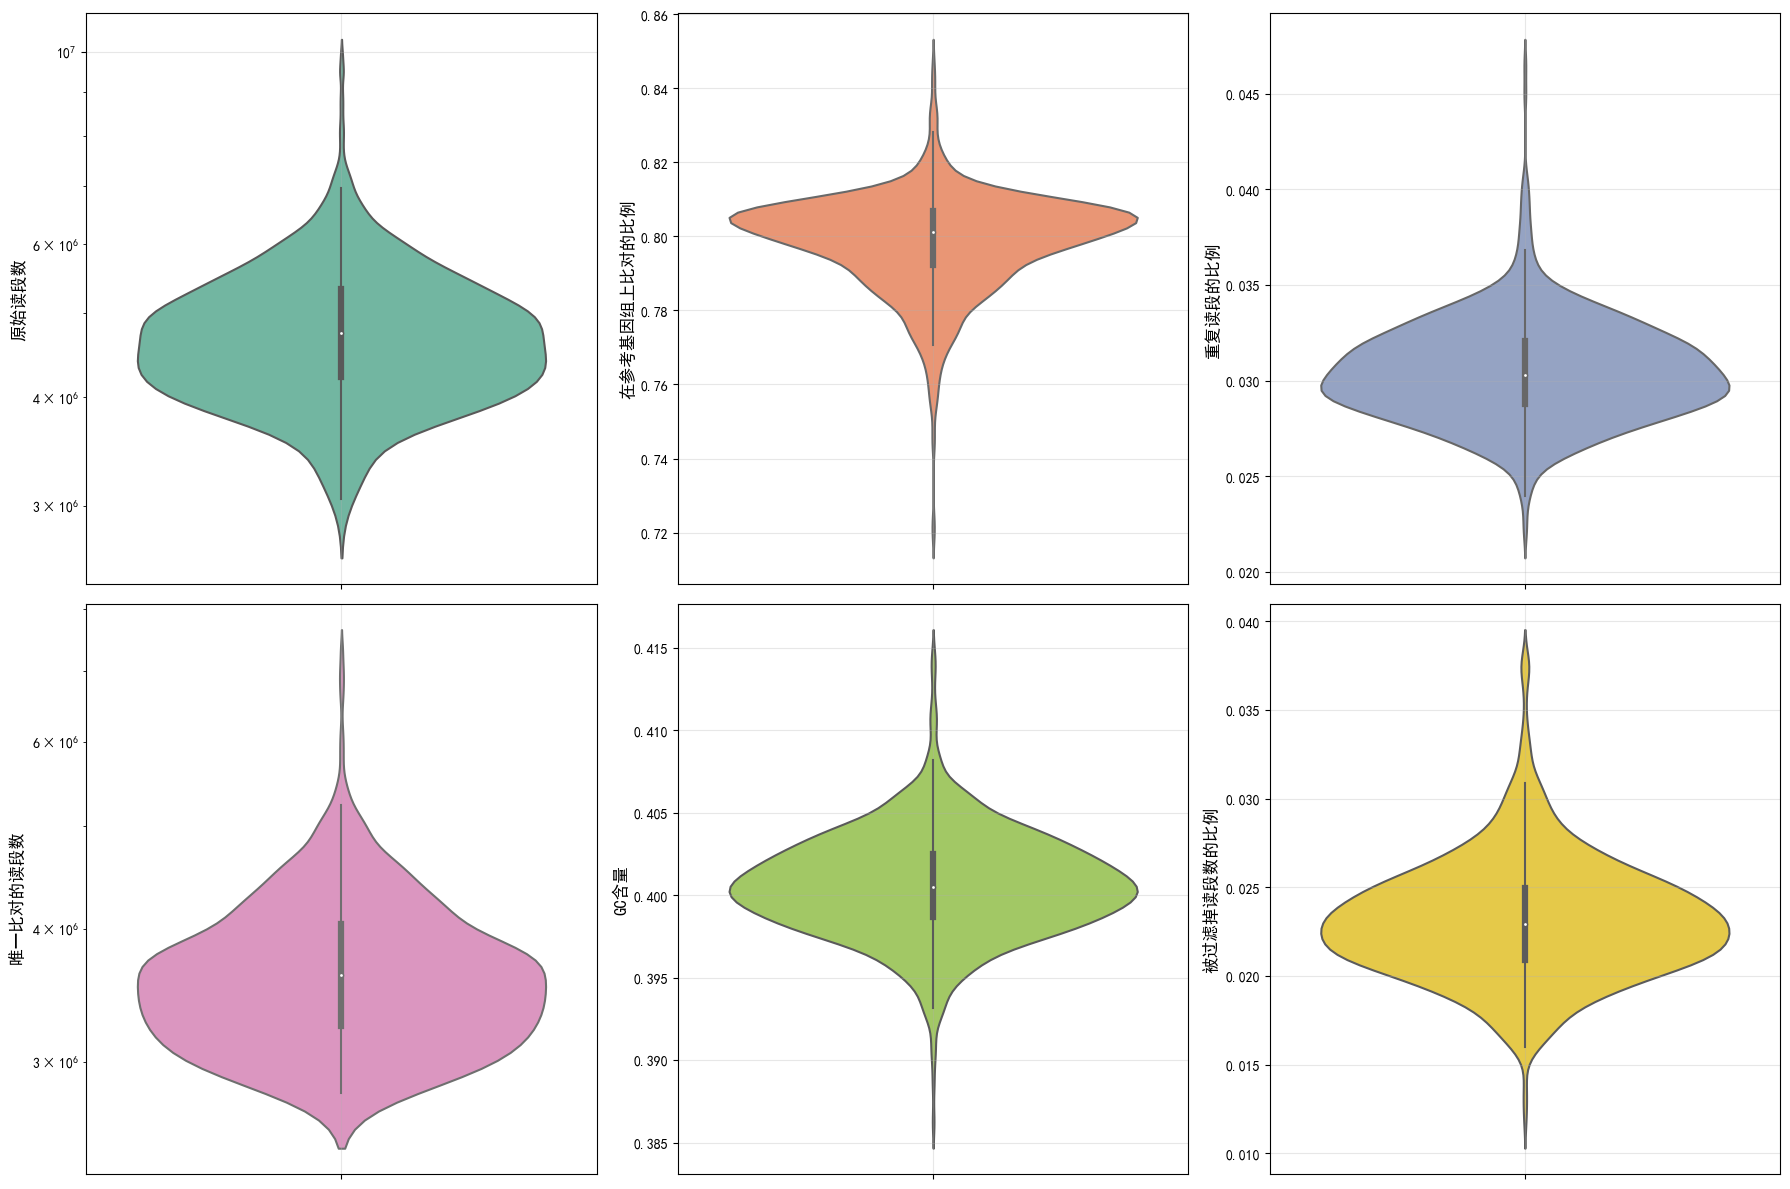

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 假设数据存储在 df 中
# df = df_clean  

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

qc_metrics = {
    '原始读段数': {'lower': 3000000, 'upper': None, 'log_scale': True},
    '在参考基因组上比对的比例': {'lower': 0.7, 'upper': 0.9, 'log_scale': False},
    '重复读段的比例': {'lower': 0, 'upper': 0.2, 'log_scale': False},
    '唯一比对的读段数  ': {'lower': 2900000, 'upper': None, 'log_scale': True},
    'GC含量': {'lower': 0.38, 'upper': 0.46, 'log_scale': False},
    '被过滤掉读段数的比例': {'lower': 0, 'upper': 0.25, 'log_scale': False}
}

# 定义每个指标的颜色
colors = sns.color_palette("Set2", 6)  # 6种颜色，可换其它调色板

# 创建图形
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (metric, params) in enumerate(qc_metrics.items()):
    ax = axes[i]
    
    # 使用不同颜色
    sns.violinplot(y=df[metric], ax=ax, color=colors[i], inner='box')
    
    # 可选：显示个体数据点
    # sns.swarmplot(y=df[metric], ax=ax, color='black', size=2, alpha=0.6)
    
    # 阈值线（可开启）
    # if params['lower'] is not None:
    #     ax.axhline(y=params['lower'], color='red', linestyle='--', alpha=0.7)
    # if params['upper'] is not None:
    #     ax.axhline(y=params['upper'], color='green', linestyle='--', alpha=0.7)
    
    # 对数坐标
    if params['log_scale']:
        ax.set_yscale('log')
    
    # 标题和标签
    #ax.set_title(f'{metric}', fontsize=14, fontweight='bold')
    ax.set_ylabel(metric, fontsize=12)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [8]:
# 最基本的方式 - 保存到当前工作目录
df.to_excel('filtered-ref.xlsx', index=False)


In [ ]:
def G(x):
    